In [175]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('training_v2.csv')
print(df.shape)
df.head()

(91713, 186)


,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

In [72]:
df.describe(include='all')

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90318,91688,90379.000000,70304,91601,91713.000000,91713,91713,91713.000000,91713.0,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,23729.000000,23729.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,23936.000000,23936.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,23754.000000,23754.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,

In [4]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [5]:
null_values(df)

Dataframe has 186 columns.
There are 175 columns that have missing values.


,Missing Values,% of Total Values
h1_bilirubin_max,84619,92.3
h1_bilirubin_min,84619,92.3
h1_lactate_min,84369,92.0
h1_lactate_max,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


In [81]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [82]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.0,22.73,0,180.3,92,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.0,27.42,0,160.0,90,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,N

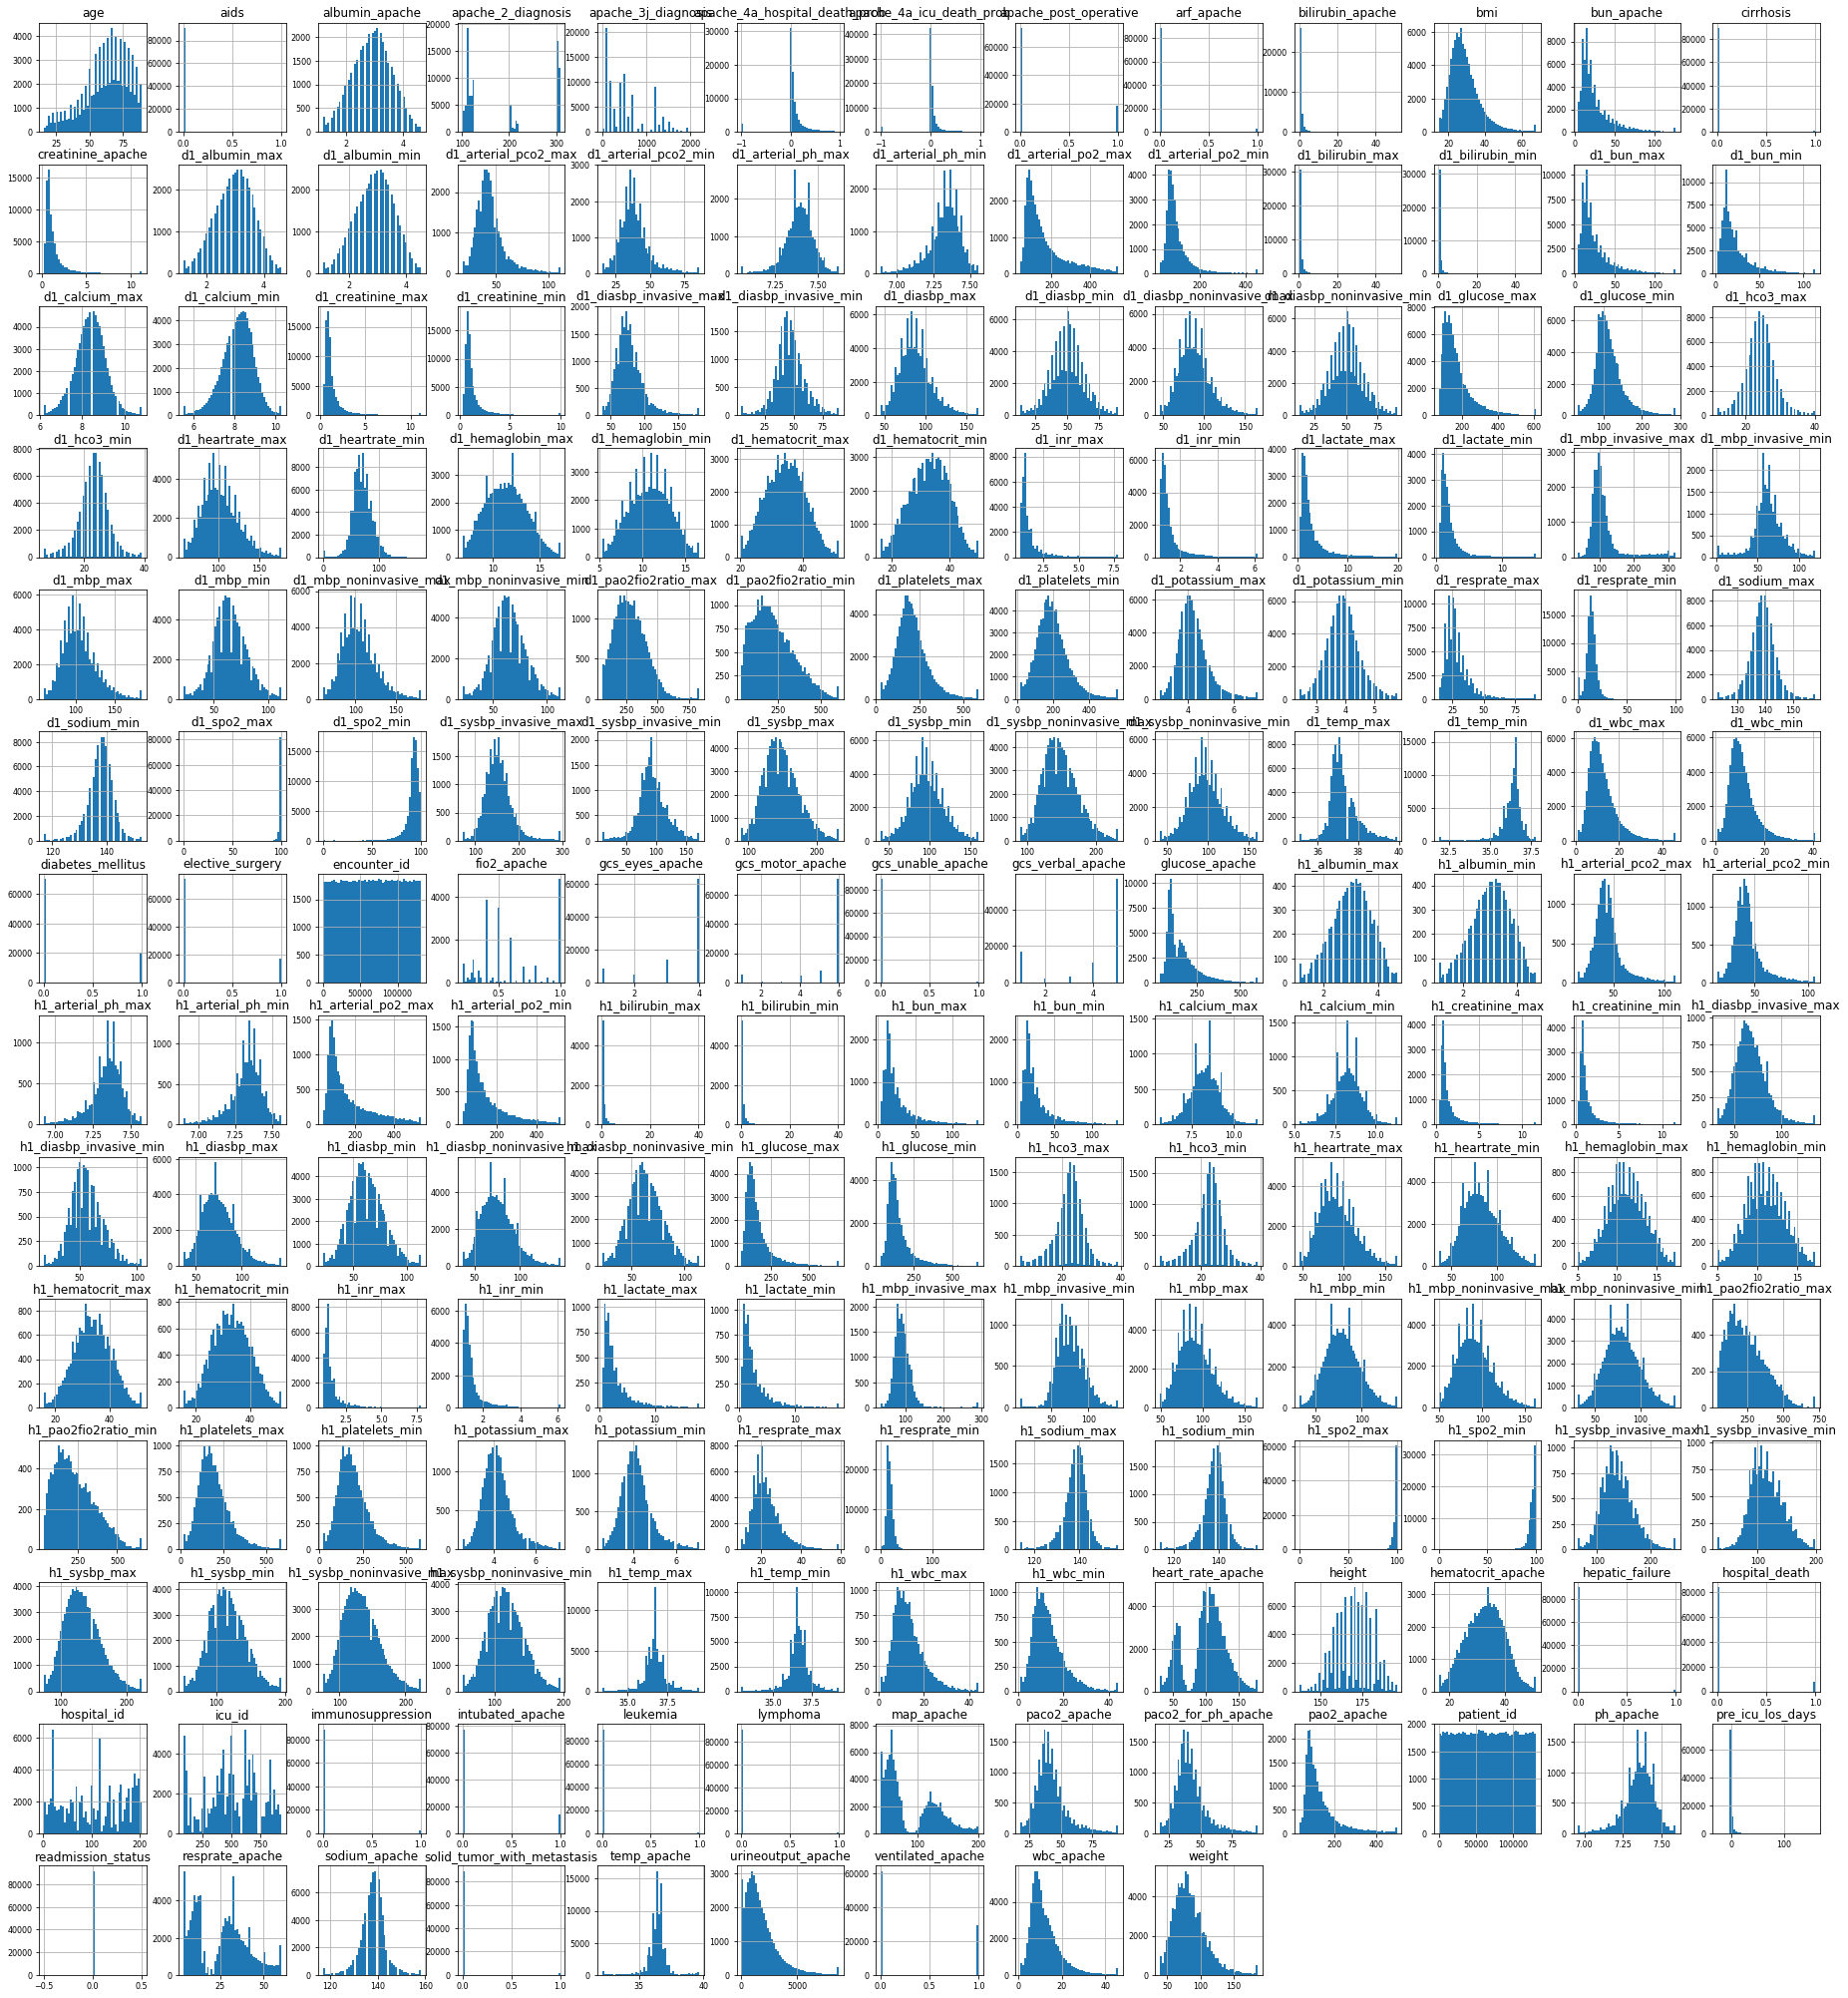

In [88]:
df_num.hist(figsize=(32, 36), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [87]:
# Check if the data is balanced or unbalanced

df['hospital_death'].value_counts(normalize=True)

0    0.913698
1    0.086302
Name: hospital_death, dtype: float64

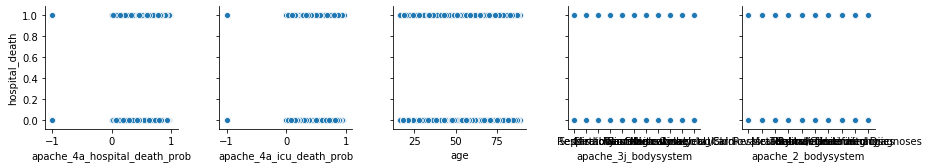

In [7]:
sns.pairplot(data=df,
             y_vars=['hospital_death'],
             x_vars=['apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'age', 'apache_3j_bodysystem', 'apache_2_bodysystem'])

In [15]:
corr_matrix = df.corr().abs()
corr_matrix

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
encounter_id,1.000000,0.009575,0.004532,0.005243,0.003990,0.001068,0.002036,0.005400,0.000992,0.000570,NaN,0.004376,0.006262,0.000113,0.000651,0.001138,0.007920,0.002198,0.002619,0.005435,0.000824,0.003276,0.007664,0.002400,0.006516,0.002108,0.001718,0.001566,0.003172,0.000759,0.015002,0.015002,0.001088,0.005632,0.006498,0.007004,0.005162,0.009225,0.005775,0.009363,0.013306,0.004230,0.002547,0.000802,0.002229,0.001202,0.003891,0.002045,0.004260,0.003335,0.000332,0.000553,0.000734,0.000472,0.006880,0.000296,0.000041,0.000512,0.008091,0.001666,0.000484,0.002455,0.000063,0.002115,0.004533,0.003035,0.001694,0.004417,0.001529,0.003506,0.000586,0.005045,0.000167,0.000930,0.000956,0.000565,0.000261,0.002202,0.000654,0.002838,0.002682,0.000351,0.001577,0.004182,0.004066,0.001393,0.002714,0.000849,0.002974,0.001240,0.003970,0.001013,0.003400,0.004386,0.001386,0.000563,0.002679,0.002602,0.002559,0.004862,0.005521,0.004719,0.003672,0.002068,0.001422,0.002499,0.001250,0.000771,0.001625,0.000353,0.006878,0.005783,0.001177,0.004329,0.001177,0.002054,0.001755,0.000521,0.006234,0.004110,0.006574,0.00554

In [13]:
## APACHE II SCORE
df['apache_2_bodysystem'].unique()

array(['Cardiovascular', 'Respiratory', 'Metabolic', 'Trauma',
       'Neurologic', 'Gastrointestinal', 'Renal/Genitourinary', nan,
       'Undefined diagnoses', 'Haematologic', 'Undefined Diagnoses'],
      dtype=object)

In [14]:
df['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary', nan,
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

## Exploration - Meghna's Vars

In [43]:
id_vars = ["encounter_id", "hospital_id", "patient_id", "hospital_death", "age", "bmi", \
           "elective_surgery", "ethnicity", "gender", "height", "hospital_admit_source", \
           "icu_admit_source", "icu_id", "icu_stay_type", "icu_type", \
           "pre_icu_los_days", "readmission_status", "weight"]

h1_col = [col for col in list(df.columns) if col.startswith('h1_')]

var_list = ["apache_4a_hospital_death_prob", "apache_4a_icu_death_prob", "aids", "cirrhosis", \
            "diabetes_mellitus", "hepatic_failure", "immunosuppression", "leukemia", "lymphoma", \
            "solid_tumor_with_metastasis", "apache_3j_bodysystem", "apache_2_bodysystem"]

In [46]:
subset = df[id_vars + h1_col + var_list]
#subset = df[id_vars] + df.loc[:, df.columns.str.startswith('hl_')] + df[var_list]

In [167]:
null_values(subset)

Dataframe has 94 columns.
There are 84 columns that have missing values.


,Missing Values,% of Total Values
h1_bilirubin_max,84619,92.3
h1_bilirubin_min,84619,92.3
h1_lactate_min,84369,92.0
h1_lactate_max,84369,92.0
h1_albumin_max,83824,91.4
h1_albumin_min,83824,91.4
h1_pao2fio2ratio_min,80195,87.4
h1_pao2fio2ratio_max,80195,87.4
h1_arterial_ph_min,76424,83.3
h1_arterial_ph_max,76424,83.3


In [168]:
subset.describe()

,encounter_id,hospital_id,patient_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.0,88993.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,16869.000000,16869.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,16798.000000,16798.000000,88102.000000,88102.000000,84372.000000,84372.000000,69981.000000,69981.000000,7889.000000,7889.000000,7094.000000,7094.000000,16622.000000,16622.000000,15850.000000,15850.000000,16756.000000,16756.000000,39099.000000,39099.000000,15619.000000,15619.000000,18590.000000,18590.000000,18293.000000,18293.000000,33772.000000,33772.000000,7344.000000,7344.000000,16040.000000,16040.000000,19611.000000,19611.000000,19096.000000,19096.000000,15760.000000,15760.000000,15754.000000,15754.000000,15289.000000,15289.000000,15768.000000,15768.000000,11518.000000,11518.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,105.669262,65537.131464,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,0.0,84.028340,67.970331,56.142925,75.354508,62.838150,75.805934,63.270616,92.229198,83.663720,94.883633,75.971130,91.612950,79.400028,91.594126,79.709315,22.633614,17.211525,98.044637,95.174310,138.702822,114.834099,133.247395,116.362296,133.054686,116.549625,36.710858,36.607651,3.030080,3.029078,1.098612,1.097752,25.844538,25.819252,8.283716,8.282292,1.531221,1.528784,167.985117,159.222742,22.496696,22.421698,11.186665,11.038962,33.673673,33.223156,1.596476,1.482979,3.068860,3.021543,196.096010,195.481546,4.201144,4.153006,138.239610,137.901948,13.460212,13.423475,44.668444,43.383453,7.338363,7.327883,163.841354,144.154224,244.404982,235.933050,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,62.854406,37811.252183,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,0.0,25.011497,16.264587,14.142713,18.409190,16.363229,18.481826,16.422063,21.823704,20.279869,30.814198,19.225052,20.533174,19.130590,20.552018,19.236507,7.515043,6.072588,3.212934,6.625227,29.209769,27.972481,27.556986,26.510637,27.679751,26.623528,0.753090,0.776706,0.731651,0.731677,2.033590,2.032605,21.435235,21.417971,0.882434,0.885379,1.575644,1.572451,94.721856,89.157455,5.206055,5.207137,2.372244,2.409133,6.840011,7.029452,0.955843,0.748557,2.926545,2.884303,92.646583,92.779494,0.763201,0.752529,5.745875,5.676796,6.979339,6.965104,1

In [114]:
subset['icu_stay_type'].unique()

array(['admit', 'readmit', 'transfer'], dtype=object)

In [139]:
pd.crosstab(subset['icu_stay_type'], subset['hospital_death'])

hospital_death,0,1
icu_stay_type,,
admit,78843,7340
readmit,510,50
transfer,4445,525


In [118]:
subset['hospital_admit_source'].unique()

array(['Floor', 'Emergency Department', 'Operating Room', nan,
       'Direct Admit', 'Other Hospital', 'Other ICU', 'ICU to SDU',
       'Recovery Room', 'Chest Pain Center', 'Step-Down Unit (SDU)',
       'Acute Care/Floor', 'PACU', 'Observation', 'ICU', 'Other'],
      dtype=object)

In [138]:
pd.crosstab(subset['hospital_admit_source'], subset['hospital_death']) 

hospital_death,0,1
hospital_admit_source,,
Acute Care/Floor,1709,201
Chest Pain Center,126,8
Direct Admit,5780,661
Emergency Department,33735,3227
Floor,6937,1118
ICU,32,3
ICU to SDU,42,3
Observation,10,0
Operating Room,9442,345


In [129]:
subset[['elective_surgery']].groupby('elective_surgery').size() / len(subset)

elective_surgery
0    0.816264
1    0.183736
dtype: float64

## h1_heartrate_max, h1_heartrate_min 
## The patient's highest/lowest heart rate during the first hour of their unit stay 

In [232]:
# Only 3% of the data is missing both variables. 
subset[["h1_heartrate_max", "h1_heartrate_min"]].isnull(). \
groupby(["h1_heartrate_max", "h1_heartrate_min"]).sum()
# When one is missing, the other is too

,
h1_heartrate_max,h1_heartrate_min
False,False
True,True


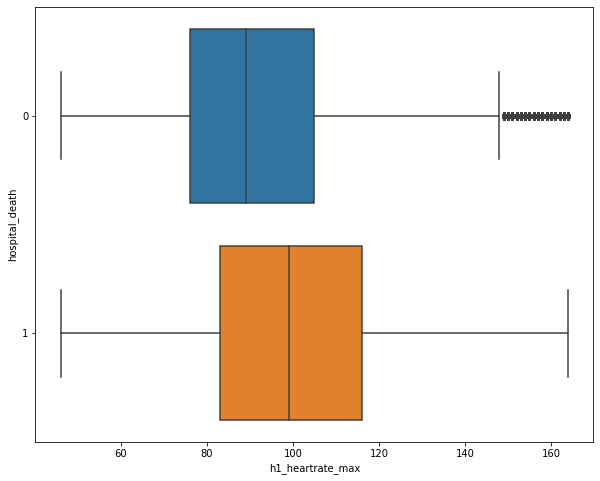

In [254]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_heartrate_max", y="hospital_death", orient = "h", data=subset)

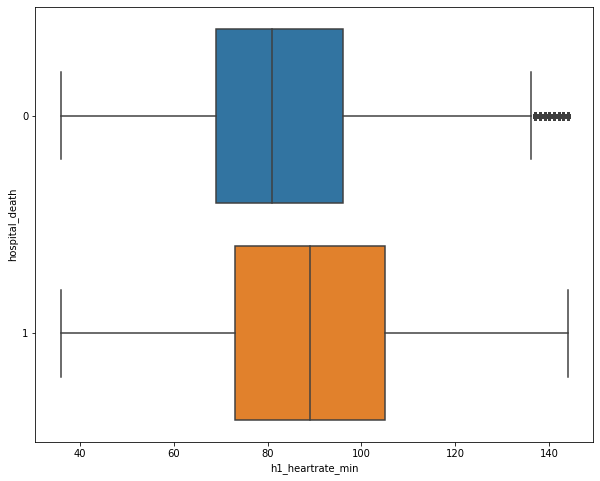

In [257]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_heartrate_min", y="hospital_death", orient = "h", data=subset)

In [140]:
subset[subset.h1_heartrate_max.isnull()][["hospital_death", "hospital_admit_source", "readmission_status"]].\
groupby(["hospital_death", "hospital_admit_source", "readmission_status"]).size()\
/ len(subset[subset.h1_heartrate_max.isnull()])

hospital_death  hospital_admit_source  readmission_status
0               Acute Care/Floor       0                     0.039785
                Chest Pain Center      0                     0.000358
                Direct Admit           0                     0.067742
                Emergency Department   0                     0.457348
                Floor                  0                     0.091756
                ICU                    0                     0.000717
                Operating Room         0                     0.096057
                Other Hospital         0                     0.010753
                Other ICU              0                     0.002867
                PACU                   0                     0.003226
                Recovery Room          0                     0.022581
                Step-Down Unit (SDU)   0                     0.005018
1               Acute Care/Floor       0                     0.002867
                Direct Admit    

## h1_mbp_invasive_max, h1_mbp_invasive_min
## The patient's highest/lowest mean blood pressure during the first hour of their unit stay, invasively measured

In [234]:
subset[["h1_mbp_invasive_max", "h1_mbp_invasive_min"]].isnull(). \
groupby(["h1_mbp_invasive_max", "h1_mbp_invasive_min"]).sum()

,
h1_mbp_invasive_max,h1_mbp_invasive_min
False,False
True,True


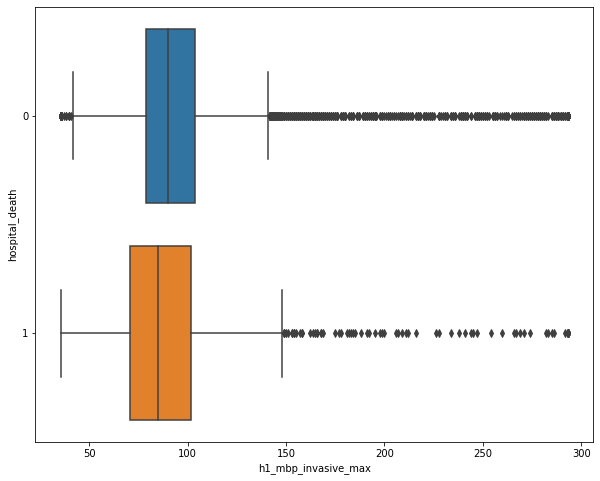

In [252]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_mbp_invasive_max", y="hospital_death", orient = "h", data=subset)

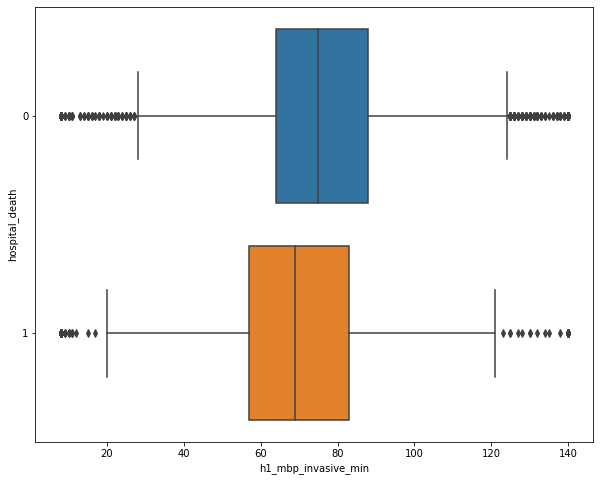

In [253]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_mbp_invasive_min", y="hospital_death", orient = "h", data=subset)

In [153]:
subset[subset.h1_mbp_invasive_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size()\
/ len(subset[subset.h1_mbp_invasive_max.isnull()])

hospital_death
0    0.911603
1    0.088397
dtype: float64

## h1_mbp_max, h1_mbp_min
## The patient's highest/lowest mean blood pressure during the first hour of their unit stay, either non-invasively or invasively measured

In [236]:
# 81.6% obs are missing these
subset[["h1_mbp_max", "h1_mbp_min"]].isnull(). \
groupby(["h1_mbp_max", "h1_mbp_min"]).sum()

,
h1_mbp_max,h1_mbp_min
False,False
True,True


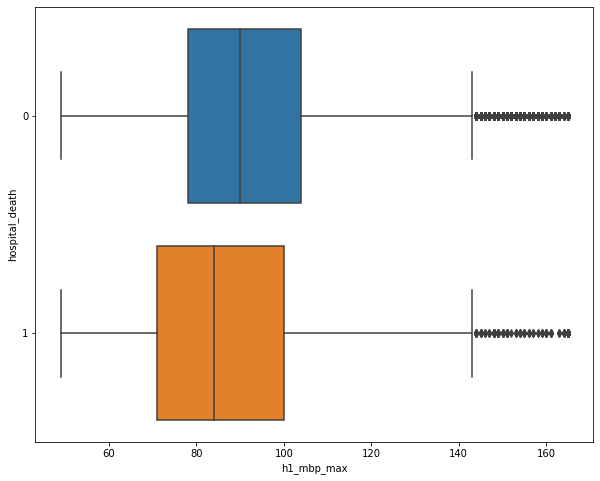

In [256]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_mbp_max", y="hospital_death", orient = "h", data=subset)

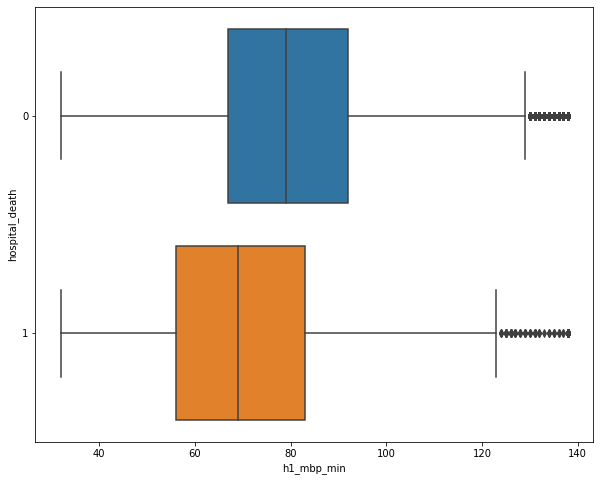

In [258]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_mbp_min", y="hospital_death", orient = "h", data=subset)

In [141]:
subset[subset.h1_mbp_max.isnull()][["hospital_death", "hospital_admit_source", "readmission_status"]].\
groupby(["hospital_death", "hospital_admit_source", "readmission_status"]).size() \
/ len(subset[subset.h1_mbp_max.isnull()])

hospital_death  hospital_admit_source  readmission_status
0               Acute Care/Floor       0                     0.027592
                Chest Pain Center      0                     0.000216
                Direct Admit           0                     0.070920
                Emergency Department   0                     0.446864
                Floor                  0                     0.105626
                ICU                    0                     0.000862
                ICU to SDU             0                     0.000216
                Operating Room         0                     0.081914
                Other                  0                     0.000216
                Other Hospital         0                     0.012287
                Other ICU              0                     0.004096
                PACU                   0                     0.003018
                Recovery Room          0                     0.025437
                Step-Down Unit (

## h1_mbp_noninvasive_max, h1_mbp_noninvasive_min
## The patient's highest/lowest mean blood pressure during the first hour of their unit stay, non-invasively measured

In [237]:
subset[["h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min"]].isnull(). \
groupby(["h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min"]).sum()

,
h1_mbp_noninvasive_max,h1_mbp_noninvasive_min
False,False
True,True


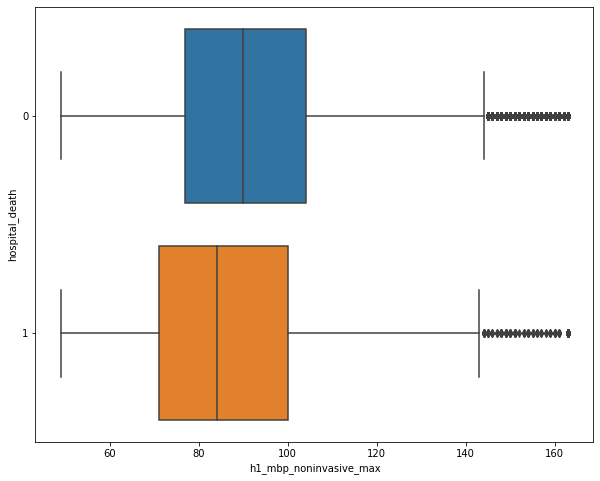

In [260]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_mbp_noninvasive_max", y="hospital_death", orient = "h", data=subset)

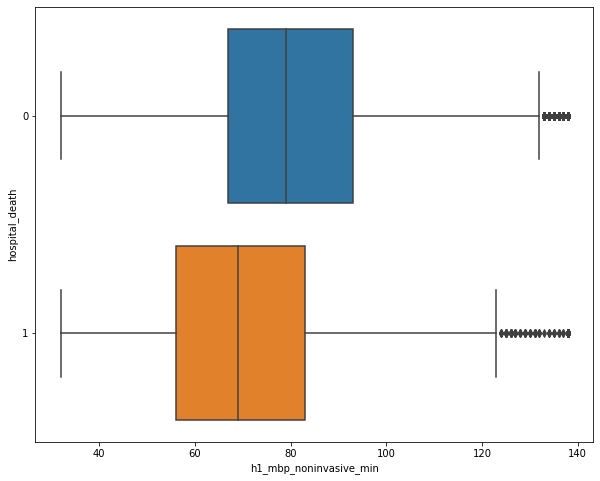

In [261]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_mbp_noninvasive_min", y="hospital_death", orient = "h", data=subset)

In [148]:
subset[subset.h1_mbp_noninvasive_max.isnull()][["hospital_death", "hospital_admit_source", "readmission_status"]].\
groupby(["hospital_death", "hospital_admit_source", "readmission_status"]).size() \
/ len(subset[subset.h1_mbp_noninvasive_max.isnull()])

hospital_death  hospital_admit_source  readmission_status
0               Acute Care/Floor       0                     0.016513
                Chest Pain Center      0                     0.000330
                Direct Admit           0                     0.052400
                Emergency Department   0                     0.258036
                Floor                  0                     0.066491
                ICU                    0                     0.000661
                ICU to SDU             0                     0.001101
                Operating Room         0                     0.334654
                Other                  0                     0.000110
                Other Hospital         0                     0.011118
                Other ICU              0                     0.003523
                PACU                   0                     0.007596
                Recovery Room          0                     0.043593
                Step-Down Unit (

## h1_resprate_max, h1_resprate_min
## The patient's highest/lowest respiratory rate during the first hour of their unit stay

In [238]:
subset[["h1_resprate_max", "h1_resprate_min"]].isnull(). \
groupby(["h1_resprate_max", "h1_resprate_min"]).sum()

,
h1_resprate_max,h1_resprate_min
False,False
True,True


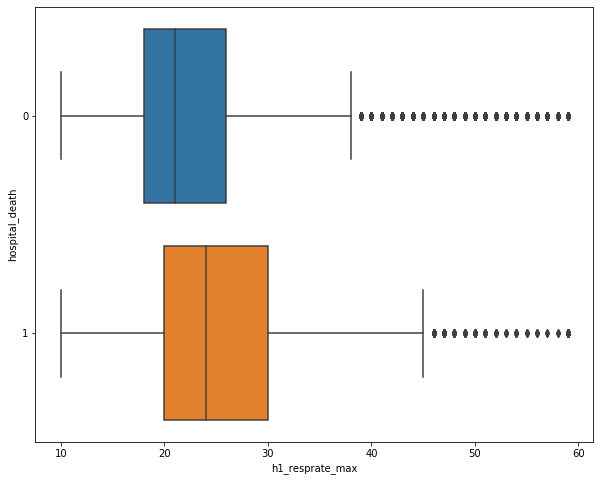

In [262]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_resprate_max", y="hospital_death", orient = "h", data=subset)

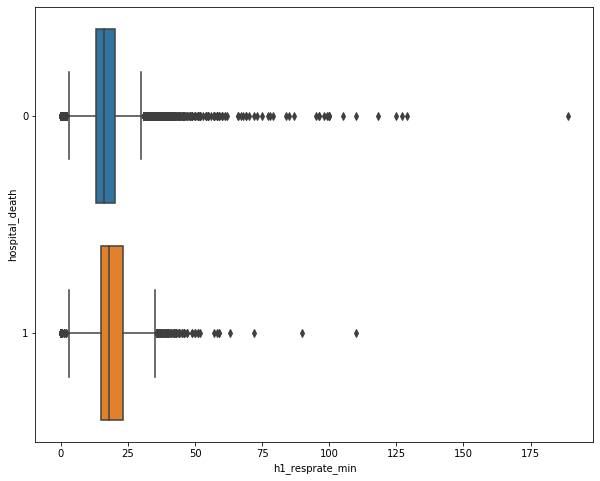

In [263]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_resprate_min", y="hospital_death", orient = "h", data=subset)

In [152]:
subset[subset.h1_resprate_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_resprate_max.isnull()])

hospital_death
0    0.922194
1    0.077806
dtype: float64

## h1_spo2_max, h1_spo2_min
## The patient's highest/lowest peripheral oxygen saturation during the first hour of their unit stay

In [239]:
subset[["h1_spo2_max", "h1_spo2_min"]].isnull(). \
groupby(["h1_spo2_max", "h1_spo2_min"]).sum()

,
h1_spo2_max,h1_spo2_min
False,False
True,True


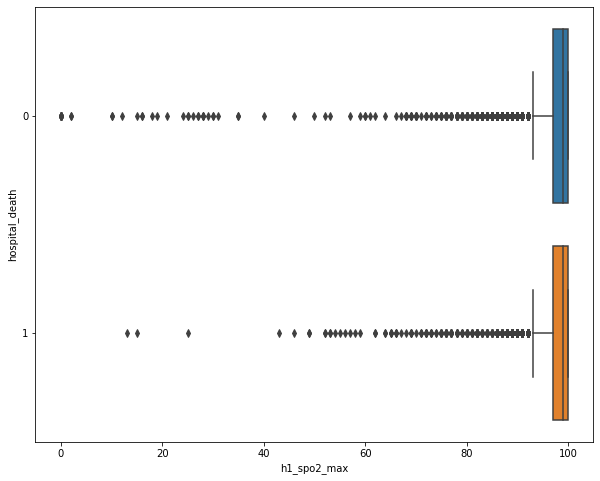

In [264]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_spo2_max", y="hospital_death", orient = "h", data=subset)

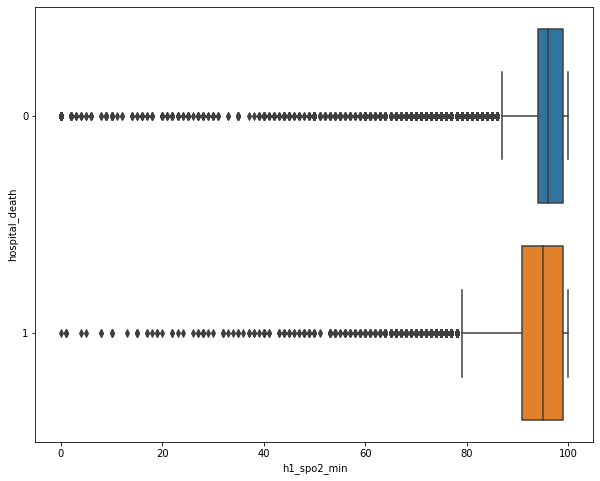

In [265]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_spo2_min", y="hospital_death", orient = "h", data=subset)

In [151]:
subset[subset.h1_spo2_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_spo2_max.isnull()])

hospital_death
0    0.910872
1    0.089128
dtype: float64

## h1_sysbp_invasive_max, h1_sysbp_invasive_min
## The patient's highest/lowest systolic blood pressure during the first hour of their unit stay, invasively measured

In [240]:
subset[["h1_sysbp_invasive_max", "h1_sysbp_invasive_min"]].isnull(). \
groupby(["h1_sysbp_invasive_max", "h1_sysbp_invasive_min"]).sum()

,
h1_sysbp_invasive_max,h1_sysbp_invasive_min
False,False
True,True


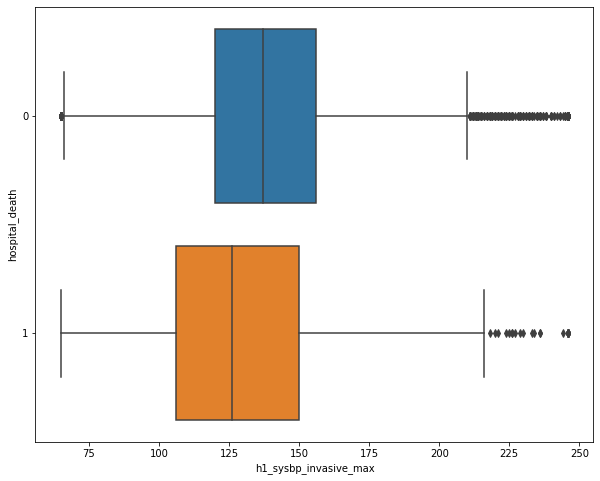

In [266]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_sysbp_invasive_max", y="hospital_death", orient = "h", data=subset)

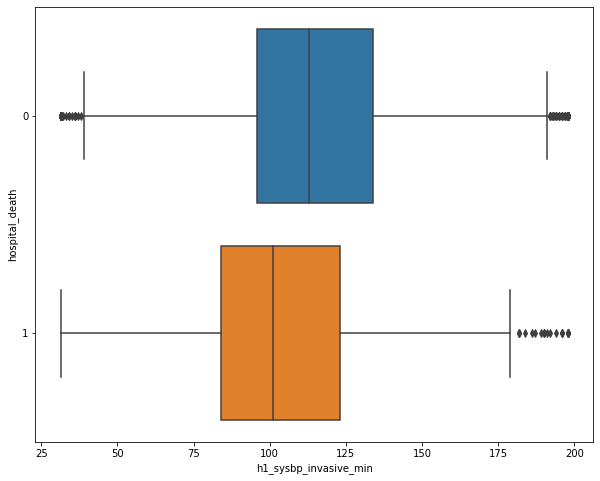

In [267]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_sysbp_invasive_min", y="hospital_death", orient = "h", data=subset)

In [98]:
subset[subset.h1_sysbp_invasive_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_sysbp_invasive_max.isnull()])

hospital_death
0    0.911366
1    0.088634
dtype: float64

## h1_sysbp_max, h1_sysbp_min
## The patient's highest/lowest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured

In [241]:
subset[["h1_sysbp_max", "h1_sysbp_min"]].isnull(). \
groupby(["h1_sysbp_max", "h1_sysbp_min"]).sum()

,
h1_sysbp_max,h1_sysbp_min
False,False
True,True


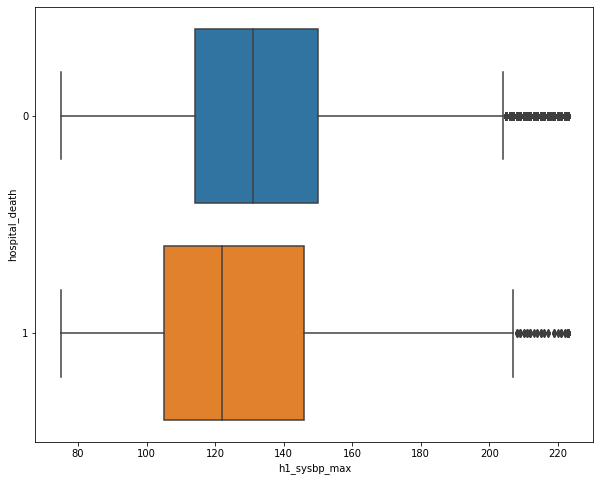

In [268]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_sysbp_max", y="hospital_death", orient = "h", data=subset)

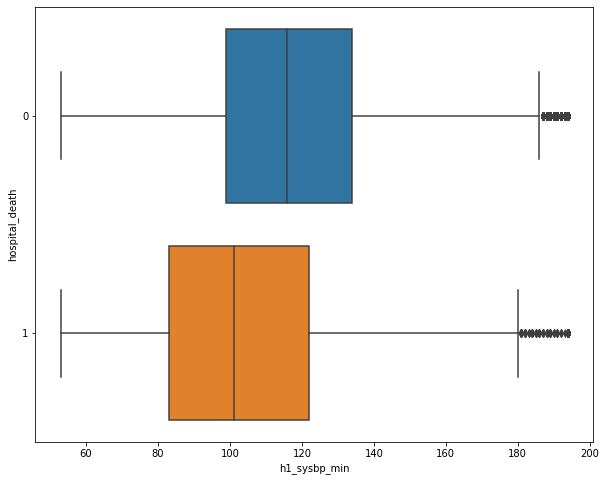

In [269]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_sysbp_min", y="hospital_death", orient = "h", data=subset)

In [100]:
subset[subset.h1_sysbp_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_sysbp_max.isnull()])

hospital_death
0    0.922182
1    0.077818
dtype: float64

## h1_sysbp_noninvasive_max, h1_sysbp_noninvasive_min
## The patient's highest/lowest systolic blood pressure during the first hour of their unit stay, non-invasively measured

In [242]:
subset[["h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min"]].isnull(). \
groupby(["h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min"]).sum()

,
h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min
False,False
True,True


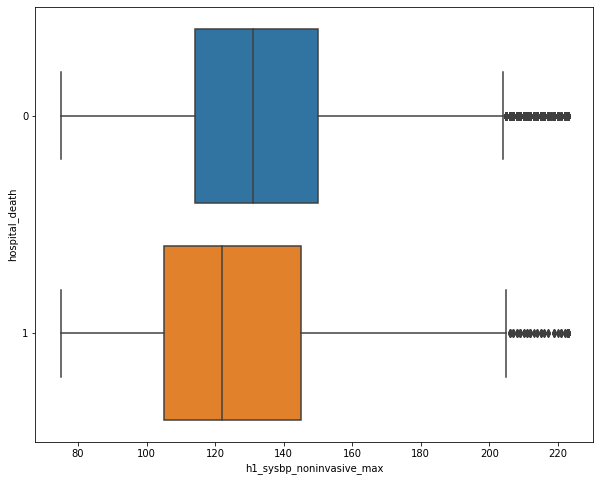

In [270]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_sysbp_noninvasive_max", y="hospital_death", orient = "h", data=subset)

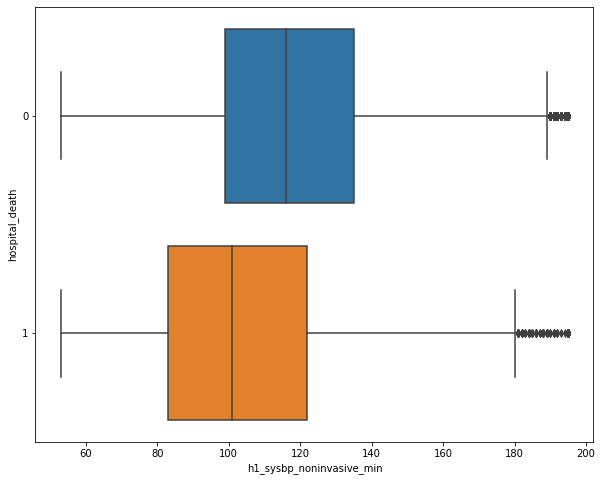

In [271]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_sysbp_noninvasive_min", y="hospital_death", orient = "h", data=subset)

In [102]:
subset[subset.h1_sysbp_noninvasive_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_sysbp_noninvasive_max.isnull()])

hospital_death
0    0.935976
1    0.064024
dtype: float64

## h1_temp_max, h1_temp_min
## The patient's highest/lowest core temperature during the first hour of their unit stay, invasively measured

In [243]:
subset[["h1_temp_max", "h1_temp_min"]].isnull(). \
groupby(["h1_temp_max", "h1_temp_min"]).sum()

,
h1_temp_max,h1_temp_min
False,False
True,True


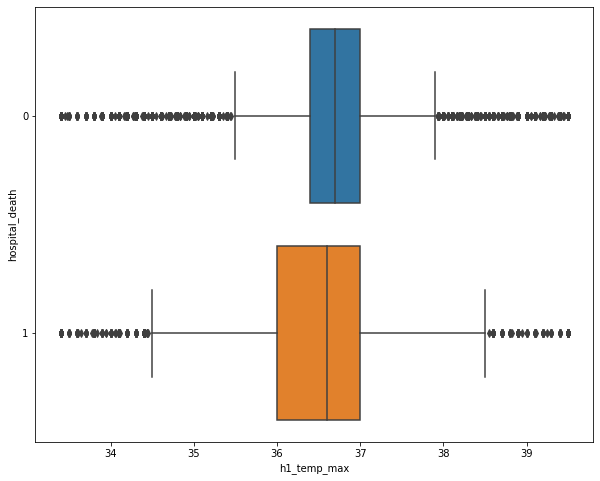

In [273]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_temp_max", y="hospital_death", orient = "h", data=subset)

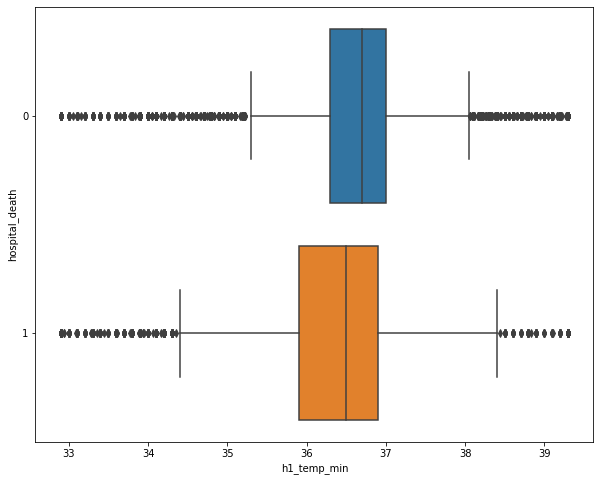

In [274]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_temp_min", y="hospital_death", orient = "h", data=subset)

In [104]:
subset[subset.h1_temp_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
/ len(subset[subset.h1_temp_max.isnull()])

hospital_death
0    0.907234
1    0.092766
dtype: float64

## h1_bilirubin_max, h1_bilirubin_min
## The highest/lowest bilirubin concentration of the patient in their serum or plasma during the first hour of their unit stay

In [244]:
subset[["h1_bilirubin_max", "h1_bilirubin_min"]].isnull(). \
groupby(["h1_bilirubin_max", "h1_bilirubin_min"]).sum()

,
h1_bilirubin_max,h1_bilirubin_min
False,False
True,True


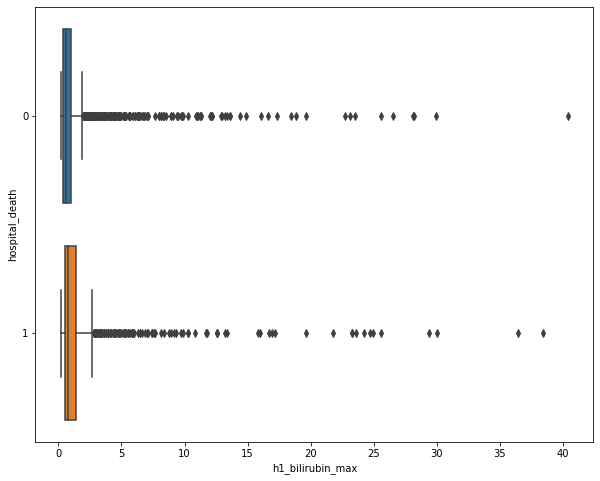

In [275]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_bilirubin_max", y="hospital_death", orient = "h", data=subset)

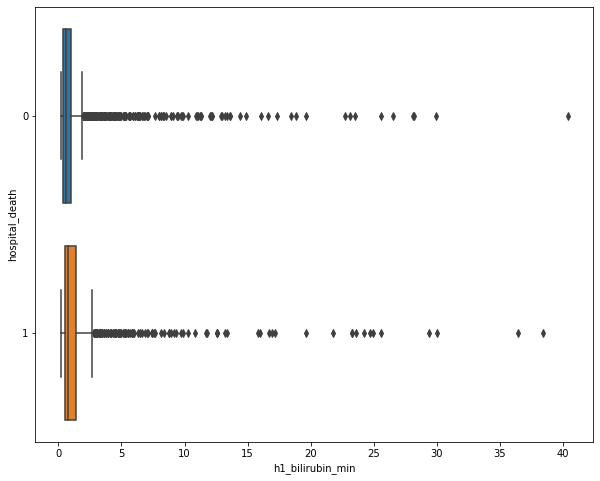

In [276]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="h1_bilirubin_min", y="hospital_death", orient = "h", data=subset)

In [156]:
subset[subset.h1_bilirubin_max.isnull()][["hospital_death"]].groupby(["hospital_death"]).size() \
#/ len(subset[subset.h1_bilirubin_max.isnull()])

hospital_death
0    77719
1     6900
dtype: int64

## apache_4a_hospital_death_prob
## The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.

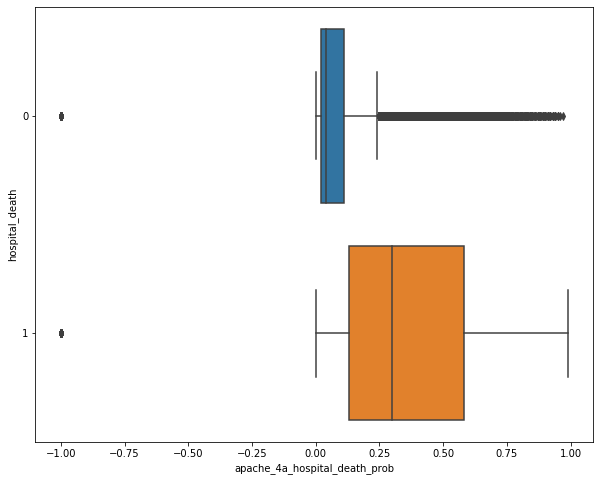

In [171]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="apache_4a_hospital_death_prob", y="hospital_death", orient = "h", data=subset)

In [190]:
subset[["apache_4a_hospital_death_prob","hospital_death"]].\
groupby(["apache_4a_hospital_death_prob"], as_index = False).mean()

,apache_4a_hospital_death_prob,hospital_death
0,-1.00,0.094053
1,0.00,0.001608
2,0.01,0.003175
3,0.02,0.009228
4,0.03,0.016125
5,0.04,0.022181
6,0.05,0.035531
7,0.06,0.039231
8,0.07,0.046947
9,0.08,0.054898


## apache_4a_icu_death_prob
## The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis

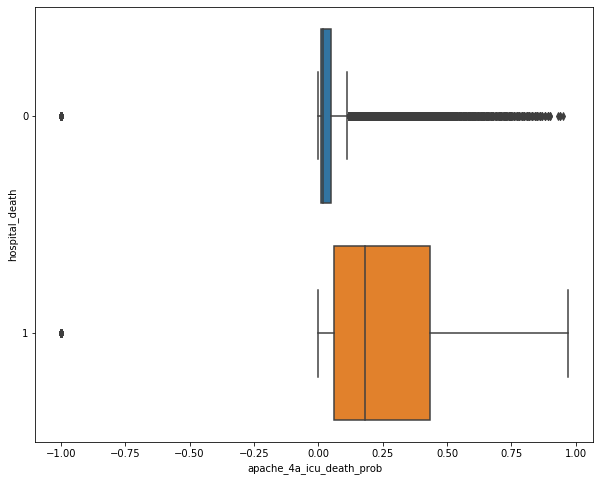

In [188]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(x="apache_4a_icu_death_prob", y="hospital_death", orient = "h", data=subset)

In [209]:
subset[["apache_4a_icu_death_prob","hospital_death"]].\
groupby(["apache_4a_icu_death_prob"], as_index = False).mean()

,apache_4a_icu_death_prob,hospital_death
0,-1.00,0.091031
1,0.00,0.001960
2,0.01,0.011998
3,0.02,0.030427
4,0.03,0.040949
5,0.04,0.058406
6,0.05,0.073913
7,0.06,0.098260
8,0.07,0.092851
9,0.08,0.130114


In [219]:
subset[["apache_4a_icu_death_prob","icu_stay_type"]].groupby(["icu_stay_type"], as_index = False).median()

,icu_stay_type,apache_4a_icu_death_prob
0,admit,0.02
1,readmit,0.02
2,transfer,0.03


##  Whether patient was diagnosed or had a history of any of the following - 
## aids,, cirrhosis, diabetes_mellitus, hepatic_failure, immunosuppression, leukemia, lymphoma or solid_tumor_with_metastasis

In [187]:
lst = ["aids","cirrhosis", "diabetes_mellitus", "hepatic_failure",\
       "immunosuppression", "leukemia", "lymphoma", "solid_tumor_with_metastasis"]
    

for x in lst:
    print(pd.crosstab(subset[x], subset['hospital_death']), "\n")
    print(pd.crosstab(subset[x], subset['icu_stay_type']), "\n")

hospital_death      0     1
aids                       
0.0             83100  7820
1.0                68    10 

icu_stay_type  admit  readmit  transfer
aids                                   
0.0            85663      554      4703
1.0               75        2         1 

hospital_death      0     1
cirrhosis                  
0.0             81988  7582
1.0              1180   248 

icu_stay_type  admit  readmit  transfer
cirrhosis                              
0.0            84374      548      4648
1.0             1364        8        56 

hospital_death         0     1
diabetes_mellitus             
0.0                64271  6235
1.0                18897  1595 

icu_stay_type      admit  readmit  transfer
diabetes_mellitus                          
0.0                66379      402      3725
1.0                19359      154       979 

hospital_death       0     1
hepatic_failure             
0.0              82200  7616
1.0                968   214 

icu_stay_type    admit  re

## apache_3j_bodysystem
## Admission diagnosis group for APACHE III

In [203]:
#1.8% missing obs
subset[["apache_3j_bodysystem","hospital_death"]].\
groupby(["apache_3j_bodysystem"], as_index = False).mean().sort_values(by='hospital_death', ascending=False)

,apache_3j_bodysystem,hospital_death
9,Sepsis,0.157922
8,Respiratory,0.112068
4,Hematological,0.090909
0,Cardiovascular,0.079669
7,Neurological,0.079018
1,Gastrointestinal,0.074230
10,Trauma,0.067413
2,Genitourinary,0.061694
6,Musculoskeletal/Skin,0.047170
5,Metabolic,0.015163


## apache_2_bodysystem
## Admission diagnosis group for APACHE II

In [208]:
#1.8% missing obs
subset[["apache_2_bodysystem","hospital_death"]].\
groupby(["apache_2_bodysystem"], as_index = False).mean().sort_values(by='hospital_death', ascending=False)

,apache_2_bodysystem,hospital_death
6,Respiratory,0.112068
0,Cardiovascular,0.108383
2,Haematologic,0.090909
4,Neurologic,0.079018
1,Gastrointestinal,0.074230
7,Trauma,0.067413
5,Renal/Genitourinary,0.055285
8,Undefined Diagnoses,0.052023
9,Undefined diagnoses,0.019639
3,Metabolic,0.015163


# Random Forest - Feature Importance

In [277]:
df1 = df.drop('hospital_death', axis=1)
y = df['hospital_death']
df1.shape

(91713, 185)

In [279]:
df1 = pd.get_dummies(df1)

In [280]:
# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(df1, y, test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(73370, 237) (73370,)
(18343, 237) (18343,)


In [281]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').